# 주성분 분석

> 여러 개의 독립변수들을 잘 설명해줄 수 있는 주된 성분을 추출하는 기법.(차원축소 기법)

- 변수의 수를 줄임으로써 모형을 간단하게 만들 수 있고, 분석 결과를 효과 적으로 해석 할 수 있다. 
- 모두 등간 척도 or 비율척도로 측정한 양적 변수여야하고, 관측치들이 서로 독립 + 정규분포를 이루고 있어야한다. 

- 데이터 공간에 위치하는 점들의 분산을 최대한 보존하는 축을 통해 차원을 축소


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


### 데이터 불러오기 및 확인

In [3]:
# 데이터 불러오기 
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 데이터 정규화 적용

In [4]:
### 데이터 스케일 정규화


# 차원축소 할 칼럼만 선택
y = df[['Type']]
df1 = df.drop('Type',axis=1)

## 데이터 정규화 적용
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df1)

## 칼럼명 결함
df_minmax = pd.DataFrame(df_minmax,columns=df1.columns)

df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


### 9개의 주성분 생성 후 설명력 확인

In [5]:
# 주성분 개수 설정  
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_minmax)

## 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data = df_pca, columns=['C1',"C2",'C3',"C4",'C5',"C6",'C7',"C8","C9"])

# 주성분의 설명력 확인
np.round_(pca.explained_variance_ratio_,3)

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

### 2개의 주성분 생성

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

## 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(df_pca,columns=["C1",'C2'])
df_pca.head()

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


### 주성분에 따른 종속변수 시각화

In [7]:
y.value_counts()

Type
2       76
1       70
7       29
3       17
5       13
6        9
Name: count, dtype: int64

<Axes: xlabel='C1', ylabel='C2'>

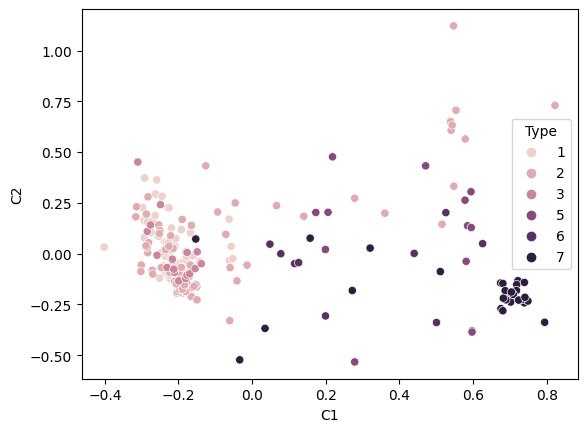

In [14]:
# 주성분에 따른 종속변수 시각화

# 주성분 테이블에 종속변수 칼럼 결합
df_concat = pd.concat([df_pca,y],axis=1)

## 산점도 시각화 
sns.scatterplot(data=df_concat,x="C1",y='C2',hue='Type')

### Type7은 C1로 0.6~0.8정도 설명가능 C2로 -0.5 ~ 0 정도 설명가능...? 


## 공통요인분석 (CFA)

> 공통 분산만을 토대로 요인을 추출하는 것이 CFA, 전체 분산을 사용하는 것이 주성분 분석

- 상관성이 높은 변수들을 묶어 잠재된 몇개의 변수를 찾는다. 
- PCA는 모든 독립변수들의 총 분산을 기반으로 요인을 추출 -> 전체변수를 가장 잘 설명해주는 순으로 주성분의 우위가 결정

- 반면 CFA는 변수들간의 공분산만을 기분으로 하여 요인을 추출 -> 기본적으로 종류가 다른 변수를 만들어 내는것이 목적 

> PCA나 CFA와 같은 요인분석을 하기 위해서는 독립변수들 간의 상관성이 요인분석에 적합한지 검증해야 한다. ex) 바틀렛test, KMO검정( 변수들간의 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값을 통계적으로 산출하는 검정 )

- 고유치는 요인이 설명해주는 분산의 양 ( 1보다 큰 요인만 선택 ). 60%까지 설명해주는것까지 선택
- 스크리 플롯을 통해 엘보우 포인트까지의 요인 선택

- 요인 적재값을 통해 +-0.3이상이면 변수와 요인에 유의성 존재한다고 봄, 0.5이상이면 중요한 변수

### 데이터 불러오기 및 확인

In [18]:
# 데이터 불러오기

df = pd.read_csv('nba2021_advanced.csv')
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


### 변수 선택 및 데이터 스케일 정규화

In [21]:
# 변수 선택 및 데이터 스케일 정규화

# 요인 분석할 칼럼만 선택
df1 = df.drop(['Player','Pos','Tm','Age'],axis=1)

# 데이터 정규화
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df1)

# 칼럼명 결합 
df_minmax = pd.DataFrame(df_minmax,columns=df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,...,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,...,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,...,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,...,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,...,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


### 바틀렛 테스트


In [24]:
chi_square_value,p_value = calculate_bartlett_sphericity(df_minmax)

chi_square_value,p_value


(20174.082695118377, 0.0)

> 0.05보다 작다 -> 변수들 간 상관관계가 있다.

### KMO 검정

In [25]:
# KMO 검정

kmo_all,kmo_test = calculate_kmo(df_minmax)
kmo_test

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159649

> 0.7 -> 약간높음 : 변수 그룹간 상관관계 약간 높음

### 전체 요인 적재 값 확인

In [26]:
# 전체 요인 적재 값 확인
fa = FactorAnalyzer(n_factors=30,rotation=None)
fa.fit(df_minmax)
ev,v = fa.get_eigenvalues()
np.round(ev,2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

### Scree Plot 


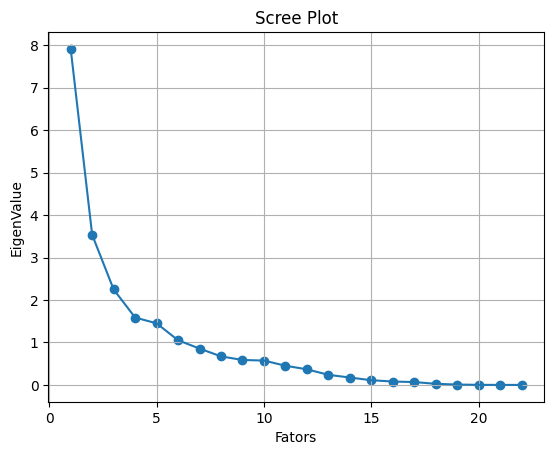

In [37]:
# Scree Plot 
plt.scatter(range(1,df_minmax.shape[1]+1),ev)
plt.plot(range(1,df_minmax.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Fators')
plt.ylabel("EigenValue")
plt.grid()
plt.show()
plt.close()

### 요인과 변수 간 요인 적재 값 확인


In [38]:
# 요인과 변수 간 요인 적재 값 확인

fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_,index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


### 요인과 변수 간 요인 적재 값 시각화

<Axes: >

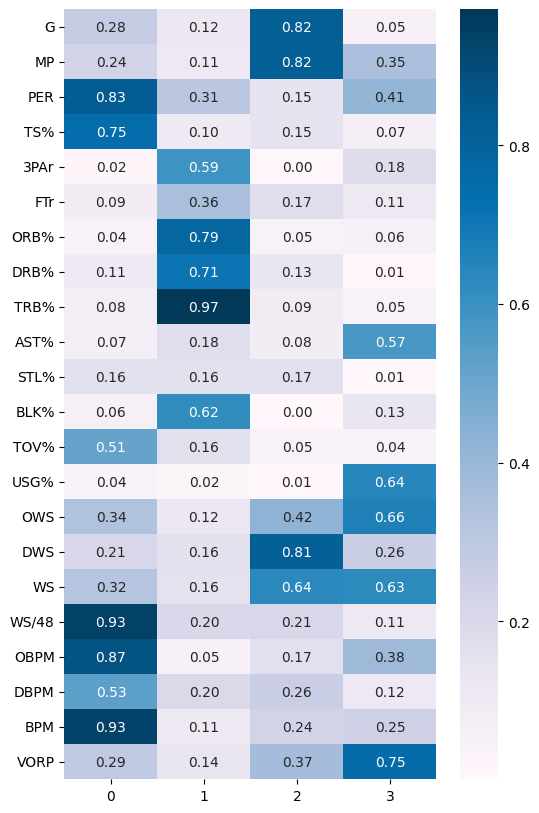

In [39]:
# 요인과 변수 간 요인 적재 값 시각화

plt.figure(figsize=(6,10))
sns.heatmap(abs(factor_loadings),cmap='PuBu',annot=True,fmt='.2f')


## 다중공선성 해결과 섀플리 밸류 분석

> 다중공선성이란 독립변수들 간의 상관관계가 높은 현상을 뜻한다. -> 두 개 이상의 독립변수가 서로 선형적인 관계를 나타낼때.

### 다중공선성을 판별하는 기준

1. 회귀분석 모델을 실행하기 전에 상관분석을 통해 독립변수 간 상관성이 높은 변수 찾는 방법, 하지만 변수만으면 힘듦
2. 회귀분석 결과에서 R-squared 값은 크지만 회귀계수에 대한 t값이 낮다면 다중공선성 의심해볼수있음
3. VIF을 통해 다중공선성 판단

### 다중공선성 해결 방법
1.  VIF 값이 높은 변수들 중에서 종속변수와의 설명력이 가장 낮은 변수를 제거하고 다시 VIF값을 확인하는 것을 반복.(가장 기본)
2. 표본관측치를 추가적으로 확보해 다중공선성 완화(잘안씀)
3. 변수를 가공하여 변수 간의 상관성을 줄이는 방법(로그,표준화,정규화) (현실적)
4.  주성분 분석을 통한 변수 축약, 해석이 어려워지는 단점.
5. 변수 선택 알고리즘. (전진선택법, 후진제거법, 단계적 선택법)

341